In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [238]:
# --------------------------------------------------------------------------------------------------------------------
# --------1. Plot the dataset using different colors for the three classes. A. speed vs price B.speed vs hp-----------
# --------------------------------------------------------------------------------------------------------------------

In [239]:
# Reading a CSV file and converting into dataframe.

def read_csv_to_dataframe(file_path):
    dataframe = pd.read_csv(file_path)
    return dataframe

In [240]:
# Code for plotting the data.

def plot_data(df, x_column, y_column, color_column):
    dataframe = df.copy(deep=False)
    dataframe['Model'] = dataframe['Model'].replace('Series N', 'red').replace('Series M', 'blue').replace('Series L', 'green')
    plt.scatter(dataframe[x_column], dataframe[y_column], c=dataframe[color_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.show()

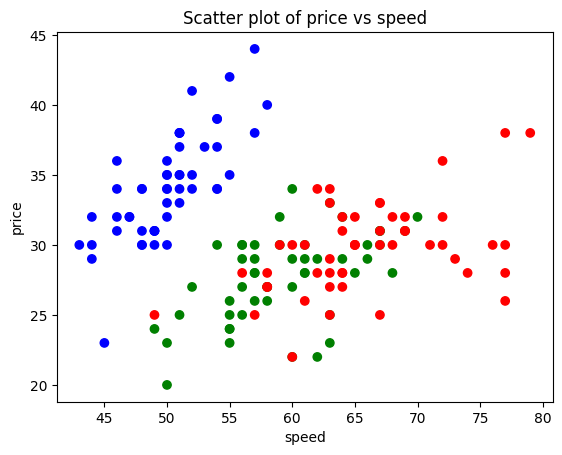

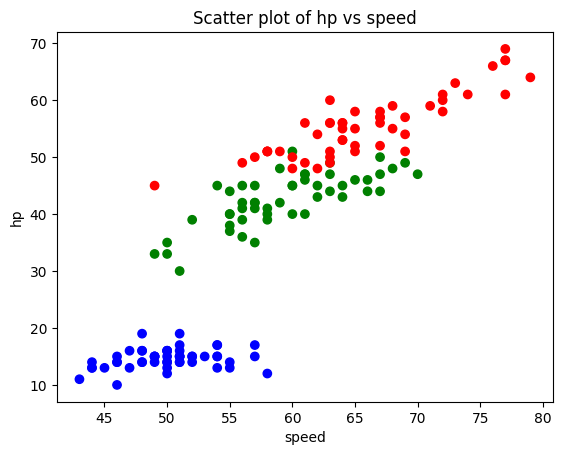

In [241]:
file_path = 'dataset_1.csv' 
df = read_csv_to_dataframe(file_path)
plot_data(df, 'speed', 'price', 'Model')
plot_data(df, 'speed', 'hp', 'Model')

In [242]:
# ------------------------------------------------------------------------------------------------------------------------
# ----2. Implement the Linear Classifier and visualize the classified samples based on the speed and price features.------
# ------------------------------------------------------------------------------------------------------------------------

In [287]:
# Plotting the hyperplanes obtained from linear regression.
def plot_linear_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)

    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='M vs non-M')
    plt.plot(line_x, line_y_n, color='yellow', label='N vs non-N')
    plt.plot(line_x, line_y_l, color='black', label='L vs non-L')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xlim(40, 80)  
    plt.ylim(0, 60)  
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

In [288]:
# Getting weight vector and intercept using linear regression.
def linear_regression_weight_vector_and_intercept(X, y_):
    X_b = np.hstack((np.ones((X.shape[0], 1)), X))
    weight_vector = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_)
    return weight_vector[1:], weight_vector[0] 

In [289]:
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '-1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '1').replace('Series L', '-1').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '-1').replace('Series N', '-1').replace('Series L', '1').values.tolist(), dtype=np.float64)

weight_vector_m, intercept_m = linear_regression_weight_vector_and_intercept(X, y_m)
weight_vector_n, intercept_n = linear_regression_weight_vector_and_intercept(X, y_n)
weight_vector_l, intercept_l = linear_regression_weight_vector_and_intercept(X, y_l)

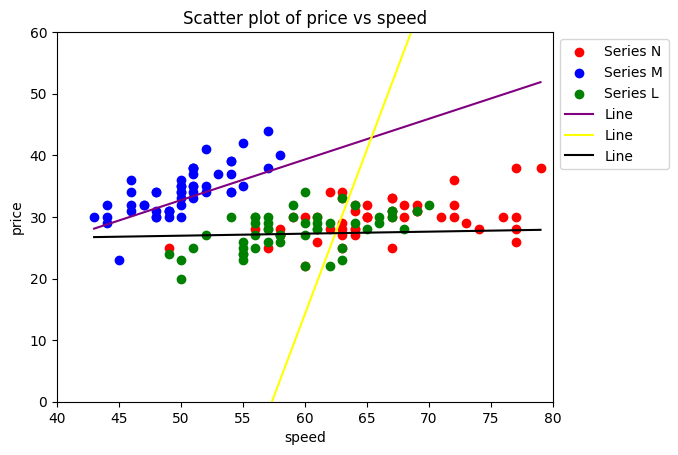

In [290]:
x_values = dataframe[x_column].values.tolist()
line_x = np.linspace(min(x_values), max(x_values), 100)
line_y_m = - (weight_vector_m[0] * line_x + intercept) / weight_vector_m[1]
line_y_n = - (weight_vector_n[0] * line_x + intercept_n) / weight_vector_n[1]
line_y_l = - (weight_vector_l[0] * line_x + intercept_l) / weight_vector_l[1]
plot_linear_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l)

In [308]:
# Prediction condition of linear regression.
def condition_function_linear_regression(x, y):
    value_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m)
    value_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n) 
    value_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l)
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [309]:
# Decision boundary plot
def plot_linear_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 0, 60
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function_linear_regression)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('Speed')
    plt.ylabel('Price')
    plt.legend()
    plt.title('Coloring the X-Y Plane based on linear regr')
    plt.show()

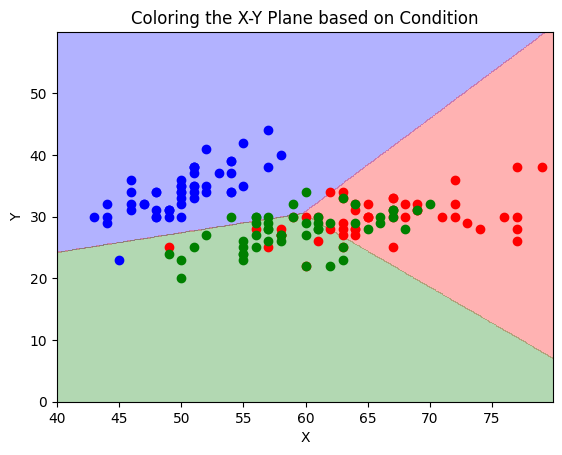

In [310]:
plot_linear_regression_decision_boundary()

In [316]:
# Decision boundary plot with misclassified examples
def plot_linear_regression_decision_boundary_with_missclassification():
    x_min, x_max = 40, 80
    y_min, y_max = 0, 60
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function_linear_regression)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    x_column_missclassified = []
    y_column_missclassified = []
    for index, row in df.iterrows():
        if condition_function_linear_regression(row[x_column], row[y_column]) == 0 and row['Model'] != 'Series M':
            x_column_missclassified.append(row[x_column])
            y_column_missclassified.append(row[y_column])
        if condition_function_linear_regression(row[x_column], row[y_column]) == 1 and row['Model'] != 'Series N':
            x_column_missclassified.append(row[x_column])
            y_column_missclassified.append(row[y_column])
        if condition_function_linear_regression(row[x_column], row[y_column]) == 2 and row['Model'] != 'Series L':
            x_column_missclassified.append(row[x_column])
            y_column_missclassified.append(row[y_column])
    plt.scatter(x_column_missclassified, y_column_missclassified, c='black', label='Missclassiied')
    plt.xlabel('Price')
    plt.ylabel('Speed')
    plt.legend()
    plt.title('Coloring the X-Y Plane based on Condition')
    plt.show()

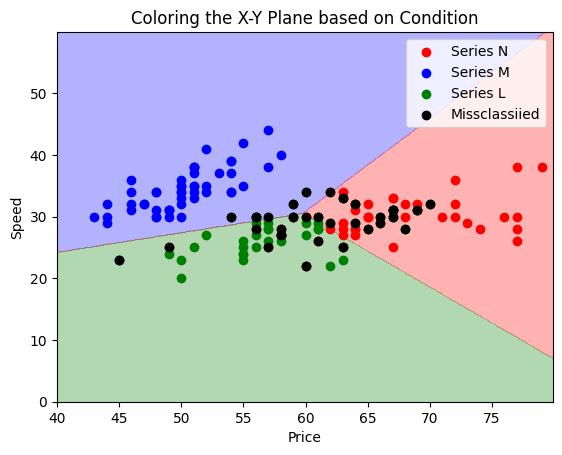

In [317]:
plot_linear_regression_decision_boundary_with_missclassification()

In [208]:
# ------------------------------------------------------------------------------------------------------------------------
# -------------------------------------3. Implement a Regularised logistic regressor. ------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [209]:
# ----------------------------------------------------- A ----------------------------------------------------------------

In [210]:
# Calculates sigmoid for a array of values.
def sigmoid(z):
    rt = []
    for idx in range(len(z)):
        if z[idx] >= 0:
            rt.append(1 / (1 + np.exp(-z[idx])))
        else:
            rt.append(np.exp(z[idx]) / (1 + np.exp(z[idx])))
    return np.array(rt)

In [211]:
# Getting weight vector and intercept using logistic regression.
def regularised_logistic_regression_weight_vector_and_intercept(X, y_, iterations, learning_rate, lamda):
    row, col = X.shape
    weight_vector = np.zeros(col)
    intercept = 0
    for _ in range(iterations):
        value = np.dot(X, weight_vector) + intercept
        y_predicted = sigmoid(value)
        dw = (1 / row) * np.dot(X.T, (y_predicted - y_)) + lamda * weight_vector
        db = (1 / row) * np.sum(y_predicted - y_)
        weight_vector -= learning_rate * dw
        intercept -= learning_rate * db
    return weight_vector, intercept

In [212]:
def spilt_data_into_training_and_testing(df, random_state):
    df_shuffled = df.sample(frac=1, random_state=random_state).reset_index(drop=True)
    total_rows = len(df_shuffled)
    train_rows = int(0.8 * total_rows)
    train_df = df_shuffled[:train_rows]
    test_df = df_shuffled[train_rows:]
    return train_df, test_df

In [213]:
# Plotting the hyperplanes obtained from logistic regression.
def plot_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)

    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='Line')
    plt.plot(line_x, line_y_n, color='yellow', label='Line')
    plt.plot(line_x, line_y_l, color='black', label='Line')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

In [214]:
# Softmax function
def softmax(z):
    exp_values = np.exp(z)
    return exp_values / np.sum(exp_values)

In [215]:
# Define your decision boundary condition function
def condition_function(x, y):
    z_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m) / np.linalg.norm(weight_vector_m)
    z_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n) / np.linalg.norm(weight_vector_n)
    z_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l) / np.linalg.norm(weight_vector_l)
    [value_1, value_2, value_3] = softmax(np.array([z_1, z_2, z_3]))
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [ ]:
def plot_logistic_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 0, 60
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Coloring the X-Y Plane based on Condition')
    plt.show()

In [216]:
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
training_accuracy = []
testing_accuracy = []
lamda = 0.1
for i in range(10):
    seed = seeds[i]
    train_df, test_df = spilt_data_into_training_and_testing(df, seed)
    
    X_train = np.array(train_df[['speed', 'price']].values.tolist())
    y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    X_test = np.array(test_df[['speed', 'price']].values.tolist())
    y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
    y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
    y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

    weight_vector_m, intercept_m = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, 1000, 0.01, lamda)
    weight_vector_n, intercept_n = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, 100000, 0.01, lamda)
    weight_vector_l, intercept_l = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, 100000, 0.01, lamda)

    training_error = len(X_train)
    for i in range(len(X_train)):
        if condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
            training_error -= 1
            
    testing_error = len(X_test)
    for i in range(len(X_test)):
        if condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
            testing_error -= 1

    training_accuracy.append(training_error/len(X_train))
    testing_accuracy.append(testing_error/len(X_test))

print("Training Accuracy mean", round(np.mean(np.array(training_accuracy)), 3))
print("Training Accuracy std", round(np.std(np.array(training_accuracy)), 3))
print("Testing Accuracy mean", round(np.mean(np.array(testing_accuracy)), 3))
print("Testing Accuracy std", round(np.std(np.array(testing_accuracy)), 3))

[0.5583333333333333, 0.6916666666666667, 0.6666666666666666, 0.6916666666666667, 0.6583333333333333, 0.6, 0.65, 0.6666666666666666, 0.65, 0.6583333333333333]
[0.5, 0.5333333333333333, 0.6, 0.5333333333333333, 0.6, 0.7666666666666667, 0.7, 0.6333333333333333, 0.6666666666666666, 0.6]
Training Accuracy mean 0.6491666666666667
Training Accuracy std 0.03881043674065005
Testing Accuracy mean 0.6133333333333334
Testing Accuracy std 0.077746025264604


In [ ]:
# --------------------------------------------- B -------------------------------------------------------------

In [228]:
beta_values = np.arange(0.001, 0.2, 0.01)
seeds = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
training_accuracy = []
testing_accuracy = []
lamda = 0.1

for beta in beta_values:
    beta = round(beta, 3)
    training_accuracy_i = []
    testing_accuracy_i = []
    
    for i in range(10):
        seed = seeds[i]
        train_df, test_df = spilt_data_into_training_and_testing(df, seed)
        
        X_train = np.array(train_df[['speed', 'price']].values.tolist())
        y_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_train = np.array(train_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_train = np.array(train_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        X_test = np.array(test_df[['speed', 'price']].values.tolist())
        y_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '2').values.tolist(), dtype=np.float64)
        y_m_test = np.array(test_df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_n_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
        y_l_test = np.array(test_df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)
    
        weight_vector_m, intercept_m = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_m_train, 1000, beta, lamda)
        weight_vector_n, intercept_n = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_n_train, 10000, beta, lamda)
        weight_vector_l, intercept_l = regularised_logistic_regression_weight_vector_and_intercept(X_train, y_l_train, 10000, beta, lamda)
    
        training_error = len(X_train)
        for i in range(len(X_train)):
            if condition_function(X_train[i][0], X_train[i][1]) != y_train[i]:
                training_error -= 1
                
        testing_error = len(X_test)
        for i in range(len(X_test)):
            if condition_function(X_test[i][0], X_test[i][1]) != y_test[i]:
                testing_error -= 1
    
        training_accuracy_i.append(training_error/len(X_train))
        testing_accuracy_i.append(testing_error/len(X_test))
        
    training_accuracy.append(round(np.mean(np.array(training_accuracy_i)), 3))
    testing_accuracy.append(round(np.mean(np.array(testing_accuracy_i)), 3))

print("Training accuracy: ", training_accuracy)
print("Testing accuarcy: ", testing_accuracy)

0.001
0.011
0.021
0.031
0.041
0.051
0.061
0.071
0.081
0.091
0.101
0.111
0.121
0.131
0.141
0.151
0.161
0.171
0.181
0.191
Training accuracy [0.6533333333333333, 0.6291666666666667, 0.5758333333333333, 0.6141666666666666, 0.5958333333333334, 0.5483333333333332, 0.5508333333333334, 0.5833333333333333, 0.48, 0.5441666666666667, 0.5458333333333334, 0.5325000000000001, 0.5258333333333333, 0.5133333333333334, 0.45916666666666667, 0.44333333333333336, 0.45666666666666667, 0.5616666666666666, 0.46833333333333327, 0.445]
Testing accuarcy [0.5900000000000001, 0.6166666666666667, 0.55, 0.6033333333333333, 0.5833333333333334, 0.5133333333333334, 0.4966666666666667, 0.5099999999999999, 0.41, 0.48999999999999994, 0.53, 0.5799999999999998, 0.4666666666666666, 0.5499999999999999, 0.4333333333333333, 0.43, 0.39666666666666667, 0.5433333333333333, 0.45, 0.43]


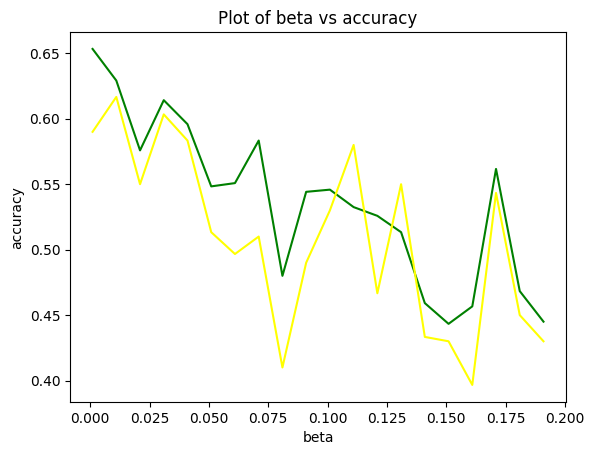

In [236]:
plt.plot(beta_values, training_accuracy, color= 'green')
plt.plot(beta_values, testing_accuracy, color = 'yellow')

plt.xlabel('beta')
plt.ylabel('accuracy')
plt.title('Plot of beta vs accuracy')

plt.show()

In [224]:
# ------------------------------------------------------ C ---------------------------------------------------------------

In [231]:
beta = 0.001
lamda = 0.1
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

weight_vector_m, intercept_m = regularised_logistic_regression_weight_vector_and_intercept(X, y_m, 1000, beta, lamda)
weight_vector_n, intercept_n = regularised_logistic_regression_weight_vector_and_intercept(X, y_n, 100000, beta, lamda)
weight_vector_l, intercept_l = regularised_logistic_regression_weight_vector_and_intercept(X, y_l, 100000, beta, lamda)

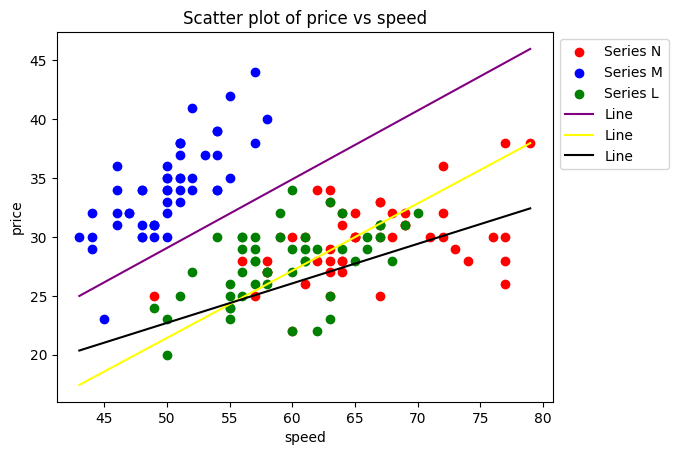

In [232]:
x_values = dataframe[x_column].values.tolist()
line_x = np.linspace(min(x_values), max(x_values), 100)
line_y_m = - (weight_vector_m[0] * line_x + intercept) / weight_vector_m[1]
line_y_n = - (weight_vector_n[0] * line_x + intercept_n) / weight_vector_n[1]
line_y_l = - (weight_vector_l[0] * line_x + intercept_l) / weight_vector_l[1]
plot_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l)

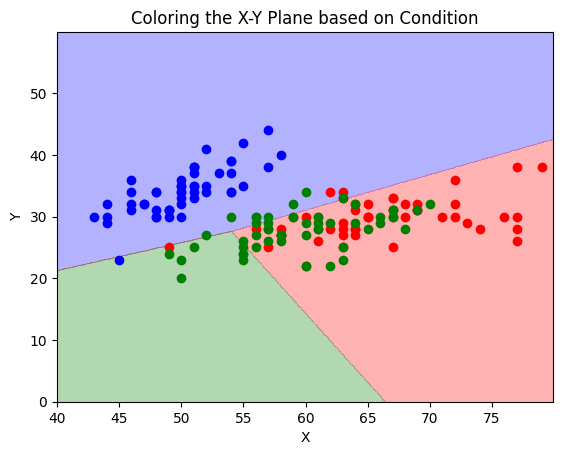

In [233]:
plot_logistic_regression_decision_boundary()

In [134]:
# ------------------------------------------------------------------------------------------------------------------------
# -------------------------------------4. Implement a Vanilla logistic regressor. ----------------------------------------
# ------------------------------------------------------------------------------------------------------------------------

In [135]:
# Calculates sigmoid for a array of values.
def sigmoid(z):
    rt = []
    for idx in range(len(z)):
        if z[idx] >= 0:
            rt.append(1 / (1 + np.exp(-z[idx])))
        else:
            rt.append(np.exp(z[idx]) / (1 + np.exp(z[idx])))
    return np.array(rt)

In [136]:
# Getting weight vector and intercept using logistic regression.
def logistic_regression_weight_vector_and_intercept(X, y_, iterations, learning_rate):
    row, col = X.shape
    weight_vector = np.zeros(col)
    intercept = 0
    for _ in range(iterations):
        value = np.dot(X, weight_vector) + intercept
        y_predicted = sigmoid(value)
        dw = (1 / row) * np.dot(X.T, (y_predicted - y_))
        db = (1 / row) * np.sum(y_predicted - y_)
        weight_vector -= learning_rate * dw
        intercept -= learning_rate * db
    return weight_vector, intercept

In [137]:
# Plotting the hyperplanes obtained from logistic regression.
def plot_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l):
    dataframe = df
    x_column = 'speed'
    y_column = 'price'
    x_values = dataframe[x_column].values.tolist()
    line_x = np.linspace(min(x_values), max(x_values), 100)

    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.plot(line_x, line_y_m, color='purple', label='Line')
    plt.plot(line_x, line_y_n, color='yellow', label='Line')
    plt.plot(line_x, line_y_l, color='black', label='Line')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"Scatter plot of {y_column} vs {x_column}")
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    plt.show()

In [150]:
X = np.array(df[['speed', 'price']].values.tolist())
y_m = np.array(df['Model'].replace('Series M', '1').replace('Series N', '0').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_n = np.array(df['Model'].replace('Series M', '0').replace('Series N', '1').replace('Series L', '0').values.tolist(), dtype=np.float64)
y_l = np.array(df['Model'].replace('Series M', '0').replace('Series N', '0').replace('Series L', '1').values.tolist(), dtype=np.float64)

weight_vector_m, intercept_m = logistic_regression_weight_vector_and_intercept(X, y_m, 1000, 0.01)
weight_vector_n, intercept_n = logistic_regression_weight_vector_and_intercept(X, y_n, 1000000, 0.001)
weight_vector_l, intercept_l = logistic_regression_weight_vector_and_intercept(X, y_l, 1000000, 0.001)

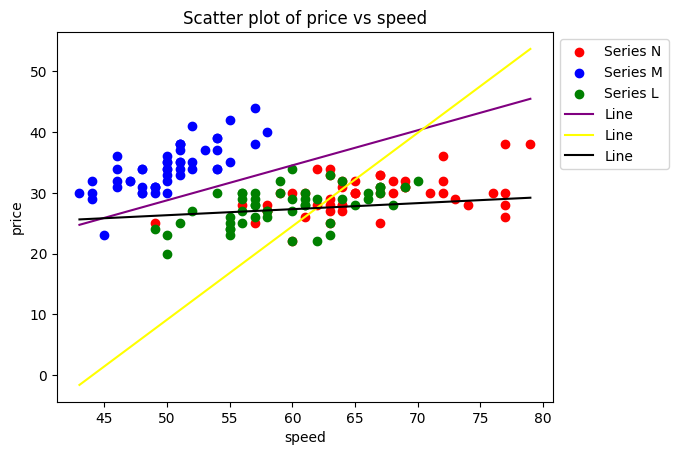

In [151]:
x_values = dataframe[x_column].values.tolist()
line_x = np.linspace(min(x_values), max(x_values), 100)
line_y_m = - (weight_vector_m[0] * line_x + intercept) / weight_vector_m[1]
line_y_n = - (weight_vector_n[0] * line_x + intercept_n) / weight_vector_n[1]
line_y_l = - (weight_vector_l[0] * line_x + intercept_l) / weight_vector_l[1]
plot_logistic_regression_hyperplanes(df, line_x, line_y_m, line_y_n, line_y_l)

In [ ]:
# Softmax function
def softmax(z):
    exp_values = np.exp(z)
    return exp_values / np.sum(exp_values)

In [311]:
# Define your decision boundary condition function
def condition_function(x, y):
    # z_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m) / np.linalg.norm(weight_vector_m)
    # z_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n) / np.linalg.norm(weight_vector_n)
    # z_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l) / np.linalg.norm(weight_vector_l)
    z_1 = (weight_vector_m[0] * x + weight_vector_m[1] * y + intercept_m)
    z_2 = (weight_vector_n[0] * x + weight_vector_n[1] * y + intercept_n)
    z_3 = (weight_vector_l[0] * x + weight_vector_l[1] * y + intercept_l)
    [value_1, value_2, value_3] = softmax(np.array([z_1, z_2, z_3]))
    if value_1 >= value_2 and value_1 >= value_3:
        return 0
    if value_2 >= value_1 and value_2 >= value_3:
        return 1
    if value_3 >= value_2 and value_3 >= value_1:
        return 2

In [312]:
def plot_logistic_regression_decision_boundary():
    x_min, x_max = 40, 80
    y_min, y_max = 0, 60
    step = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    condition_values = np.vectorize(condition_function)(xx, yy)
    plt.contourf(xx, yy, condition_values, levels=[-0.5, 0.5, 1.5, 2.5], colors=('blue', 'red', 'green'),  alpha=0.3)
    plt.scatter(dataframe[dataframe['Model'] == 'Series N'][x_column], dataframe[dataframe['Model'] == 'Series N'][y_column], c='red', label='Series N')
    plt.scatter(dataframe[dataframe['Model'] == 'Series M'][x_column], dataframe[dataframe['Model'] == 'Series M'][y_column], c='blue', label='Series M')
    plt.scatter(dataframe[dataframe['Model'] == 'Series L'][x_column], dataframe[dataframe['Model'] == 'Series L'][y_column], c='green', label='Series L')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Coloring the X-Y Plane based on Condition')
    plt.show()

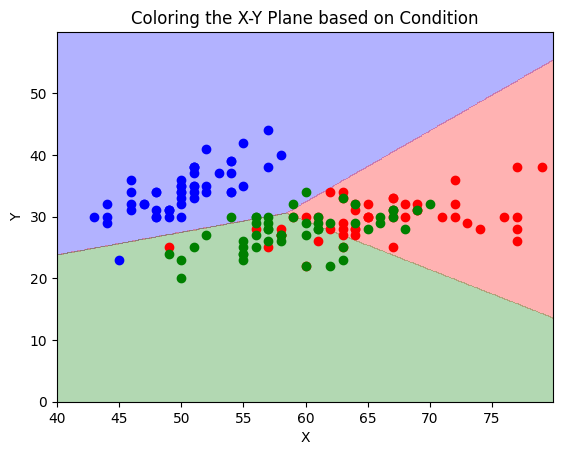

In [313]:
plot_logistic_regression_decision_boundary()